# 선형회귀(Linear Regression)
### 자동차 연비 예측하는 회귀 문제
---
- 데이터 셋: auto-mpg.csv

### 필요한 라이브러리 불러오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### 데이터 준비

In [ ]:
# !gdown https://raw.githubusercontent.com/devdio/datasets/main/auto-mpg.csv

Downloading...
From: https://raw.githubusercontent.com/devdio/datasets/main/auto-mpg.csv
To: /content/auto-mpg.csv
18.1kB [00:00, 13.9MB/s]       


In [ ]:
mpg = pd.read_csv('auto-mpg.csv', na_values=['?'])
mpg.shape

(398, 9)

In [ ]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [ ]:
mpg['horsepower'].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [ ]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [ ]:
# 결측치 존재
mpg.isna().sum(axis=0)

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [ ]:
mpg = mpg.dropna()
mpg.shape

(392, 9)

In [ ]:
mpg['origin'].value_counts()

1    245
3     79
2     68
Name: origin, dtype: int64

In [ ]:
X = mpg.drop(['mpg', 'origin', 'car name'], axis=1)
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model year
0,8,307.0,130.0,3504,12.0,70
1,8,350.0,165.0,3693,11.5,70
2,8,318.0,150.0,3436,11.0,70
3,8,304.0,150.0,3433,12.0,70
4,8,302.0,140.0,3449,10.5,70


In [ ]:
y = mpg['mpg']
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(313, 6) (79, 6)
(313,) (79,)


- 표준화(Standardization)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
y_train = y_train.values

### 모델링(Modeling)

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(6,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,561
Trainable params: 2,561
Non-trainable params: 0
_________________________________________________________________


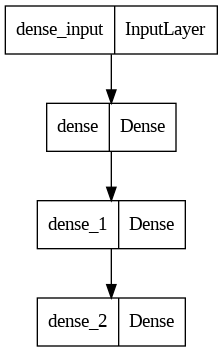

In [ ]:
tf.keras.utils.plot_model(model)

### 컴파일(Compile)

In [ ]:
model.compile(
    optimizer='adam', 
    loss='mse', 
    metrics=['mse', 'mae']
)

### 학습(Training)

In [ ]:
EPOCHS = 200
BATCH_SIZE = 32

history = model.fit(X_train_s, y_train, 
                    epochs=EPOCHS, 
                    batch_size=BATCH_SIZE, 
                    validation_split=0.2, 
                    verbose=1)

Epoch 1/200
8/8 [==============================] - 4s 207ms/step - loss: 565.1616 - mse: 565.1616 - mae: 22.5342 - val_loss: 664.0164 - val_mse: 664.0164 - val_mae: 24.6236
Epoch 2/200
8/8 [==============================] - 0s 30ms/step - loss: 547.7436 - mse: 547.7436 - mae: 22.1525 - val_loss: 643.6407 - val_mse: 643.6407 - val_mae: 24.2125
Epoch 3/200
8/8 [==============================] - 0s 26ms/step - loss: 528.8561 - mse: 528.8561 - mae: 21.7170 - val_loss: 620.0780 - val_mse: 620.0780 - val_mae: 23.7254
Epoch 4/200
8/8 [==============================] - 0s 30ms/step - loss: 506.0539 - mse: 506.0539 - mae: 21.1864 - val_loss: 592.7173 - val_mse: 592.7173 - val_mae: 23.1450
Epoch 5/200
8/8 [==============================] - 0s 36ms/step - loss: 479.3496 - mse: 479.3496 - mae: 20.5504 - val_loss: 560.0101 - val_mse: 560.0101 - val_mae: 22.4315
Epoch 6/200
8/8 [==============================] - 0s 40ms/step - loss: 447.6766 - mse: 447.6766 - mae: 19.7655 - val_loss: 520.0034 - val_

### 평가(Evaluation)

In [ ]:
model.evaluate(X_train_s, y_train)

10/10 [==============================] - 0s 2ms/step - loss: 5.8544 - mse: 5.8544 - mae: 1.7453


[5.8543500900268555, 5.8543500900268555, 1.7452646493911743]

In [ ]:
history.history.keys()

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])

In [ ]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.plot(hist['epoch'], hist['mse'], label='Train MSE')
    plt.plot(hist['epoch'], hist['val_mse'], label='Val MSE')
    plt.legend()
    plt.show()

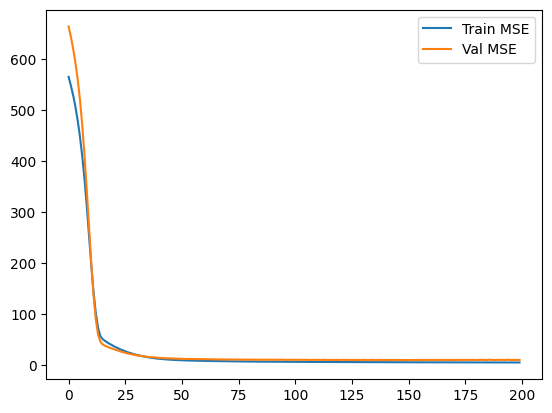

In [ ]:
plot_history(history)

### 예측(Prediction)

In [ ]:
X_test_s = scaler.transform(X_test)
y_test = y_test.values

In [ ]:
y_pred = model.predict(X_test_s)

3/3 [==============================] - 0s 4ms/step


In [ ]:
model.evaluate(X_test_s, y_test)

3/3 [==============================] - 0s 6ms/step - loss: 10.3738 - mse: 10.3738 - mae: 2.2463


[10.373780250549316, 10.373780250549316, 2.2462880611419678]

In [ ]:
y_test.shape

(79,)

In [ ]:
y_pred.shape

(79, 1)

In [ ]:
y_pred = y_pred.reshape(-1)
y_pred.shape

(79,)

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

10.373781016604157